In [57]:
import warnings

import matplotlib.pyplot as plt

from HW1.coord_relaxer import LinearCoordRelaxer
from grad import *

Метод золотого сечения.
---

0. Берем отрезок [a, b]
1. Ставим на нем две точки `x1` и `x2` в пропорции золотого сечения.
    $x_1 = b - {b - a \over \phi}$
    $x_2 = a + {b - a \over \phi}$
2. Считаем значения в этих точках
    $y_1 = f(x_1)$
    $y_2 = f(x_2)$
3. Проверяем, если $|y_1 - y_2| < \varepsilon$, значит мы достаточно близко к ответу (с точностью $\varepsilon$). Здачит, завершаем программу.
4. Сдвигаем границы
    Если $y_1 \leq y_2 \Rightarrow b = x_2, x_2 = x_1, x_1 = b - {b - a \over \phi}, y_2 = y_1, y_1 = f(x_1)$
    Если $y_2 \leq y_1 \Rightarrow a = x_1, x_1 = x_2, x_2 = a + {b - a \over \phi}, y_1 = y_2, y_2 = f(x_2)$
5. Возвращаемся к пункту `3`

# Example 1

> $dim = 1$.
>
> $f(x) = x - sin(x)$, where $x \geq 0; -x$, otherwise

In [58]:
def f(coord):
    if coord >= 0:
        return coord - np.sin(coord)
    else:
        return -coord

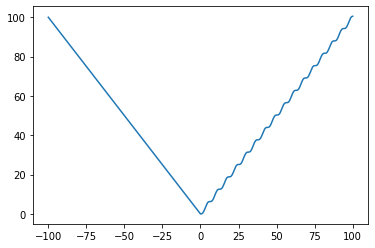

In [59]:
xs = np.linspace(-100, 100, 1000)
ys = list(map(f, xs))

plt.plot(xs, ys)
plt.show()

[1.12322507e-05] [2.36183279e-16]
{'gradient_call_count': 170, 'function_call_count': 3353, 'points': array([[-6.04680750e+01,  6.04680750e+01],
       [-5.99680780e+01,  5.99680780e+01],
       [-5.94680810e+01,  5.94680810e+01],
       [-5.89680839e+01,  5.89680839e+01],
       [-5.84680869e+01,  5.84680869e+01],
       [-5.79680899e+01,  5.79680899e+01],
       [-5.74680929e+01,  5.74680929e+01],
       [-5.69680959e+01,  5.69680959e+01],
       [-5.64680988e+01,  5.64680988e+01],
       [-5.59681018e+01,  5.59681018e+01],
       [-5.54681048e+01,  5.54681048e+01],
       [-5.49681078e+01,  5.49681078e+01],
       [-5.44681108e+01,  5.44681108e+01],
       [-5.39681137e+01,  5.39681137e+01],
       [-5.34681167e+01,  5.34681167e+01],
       [-5.29681197e+01,  5.29681197e+01],
       [-5.24681227e+01,  5.24681227e+01],
       [-5.19681257e+01,  5.19681257e+01],
       [-5.14681286e+01,  5.14681286e+01],
       [-5.09681316e+01,  5.09681316e+01],
       [-5.04681346e+01,  5.04681346e+

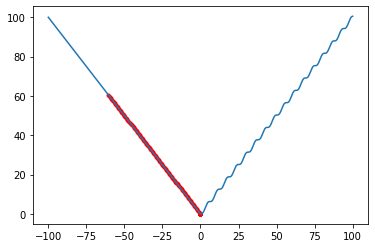

In [60]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    (x, y), meta = gradient_descent(f, 1, coord_relaxer=LinearCoordRelaxer(f, alpha=5, eps=1e-5))
    print(x, y)
    print(meta)

    plt.plot(meta["points"][:, 0], meta["points"][:, 1], 'r.')
    plt.plot(xs, ys)
    plt.show()

# Example 2

> $dim = 2$.
>
> $f(x, y) = sin(x / 20) * cos(e + y / 20)$

In [61]:
def f(coord):
    return np.sin(coord[0] / 20) * np.cos(np.e + coord[1] / 20)

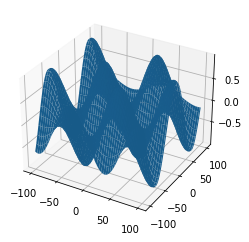

In [62]:
t = np.linspace(-100, 100, 100)
X, Y = np.meshgrid(t, t)
ax = plt.figure().add_subplot(projection='3d')
ax.plot_surface(X, Y, f([X, Y]))

plt.show()

/home/easyhacks/Документы/git/Optimization-Methods-IFMO/HW1/grad.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([coord, f(coord)]).reshape(1, 2),


[31.5521255   8.66211816] -0.9999288420647935
{'gradient_call_count': 550, 'function_call_count': 6675, 'points': array([[array([34.15073721, 13.08288091]), -0.9643892583663638],
       [array([34.1345029 , 13.05492199]), -0.964812596233801],
       [array([34.11835907, 13.02712631]), -0.9652310608492395],
       ...,
       [array([31.55318377,  8.66400226]), -0.9999275532018335],
       [array([31.55265361,  8.66305795]), -0.9999282005515412],
       [array([31.5521255 ,  8.66211816]), -0.9999288420647935]],
      dtype=object)}


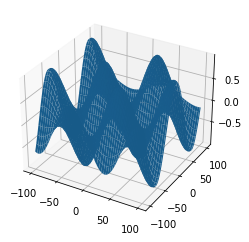

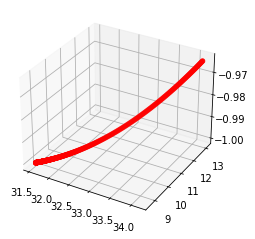

In [63]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    (xs, y), meta = gradient_descent(f, 2, lr=0.5, coord_relaxer=LinearCoordRelaxer(f, alpha=5, eps=1e-3))
    print(xs, y)
    print(meta)

    t = np.linspace(-100, 100, 100)
    X, Y = np.meshgrid(t, t)
    ax = plt.figure().add_subplot(projection='3d')
    ax.plot_surface(X, Y, f([X, Y]))

    XS = np.array([])
    YS = np.array([])
    ZS = meta["points"][:, 1]

    for point in meta["points"][:, 0]:
        XS = np.append(XS, point[0])
        YS = np.append(YS, point[1])

    ax_points = plt.figure().add_subplot(projection='3d')
    ax_points.scatter(XS, YS, ZS, c='r')

    plt.show()